### Exploração dos conceitos de tipo de variáveis, distribuições de frequências e gráficos para cada variáveis

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('datasets/dados.csv')
data

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


#### Variáveis qualitativas ordinais
Existe uma ordenação entre as categorias, nesse caso, 'Anos de Estudo' é qualitativa ordinal, pois grau de instrução são baseados no número de anos de escolaridade

In [3]:
data['Anos de Estudo']

0        12
1        12
2        15
3         6
4         9
         ..
76835    11
76836     7
76837    12
76838     4
76839     4
Name: Anos de Estudo, Length: 76840, dtype: int64

In [4]:
data['Anos de Estudo'].unique()

array([12, 15,  6,  9, 14, 16, 10,  1,  5,  7,  3,  2,  4,  8, 11, 17, 13],
      dtype=int64)

In [5]:
sorted(data['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

#### Variáveis qualitativas nominais
Não existe uma ordenação entre as categorias, nesse caso, 'UF', 'Sexo', 'Cor' são qualitativas nominais

In [6]:
data['UF'].unique()

array([11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31,
       32, 33, 35, 41, 42, 43, 50, 51, 52, 53], dtype=int64)

In [7]:
sorted(data['Sexo'].unique())

[0, 1]

In [8]:
sorted(data['Cor'].unique())

[0, 2, 4, 6, 8]

#### Variáveis quantitativas contínuas
Os valores pertencem a um intervalo de números reais e que resultam de uma mensuração, nesse caso, 'Altura' é variável contínua

In [9]:
minima = data['Altura'].min()
maxima = data['Altura'].max()

print(f'A altura minima é {minima} e a maxima é {maxima}')

A altura minima é 1.339244614 e a maxima é 2.028496765


#### Variaveis quantitativas discretas
Os valores formam um conjunto finito ou enumerável de números, e que resultam, frequentemente, de uma contagem. Nesse caso, 'Idade' e 'Renda' são variáveis discretas

In [10]:
idade_minima = data['Idade'].min()
idade_maxima = data['Idade'].max()

renda_minima = data['Renda'].min()
renda_maxima = data['Renda'].max()

print(f'A idade minima é {idade_minima} e a maxima é {idade_maxima}\nJá a menor renda é R${renda_minima} e a maior é R${renda_maxima}')


A idade minima é 13 e a maxima é 99
Já a menor renda é R$0 e a maior é R$200000


#### Distribuição de Frequências
Contabiliza o número de ocorrências de cada valor

In [11]:
frequencia = data['Sexo'].value_counts()

normalize - > Se for True, o objeto retornado conterá as frequências relativas dos valores exclusivos.

In [12]:
percentual = data['Sexo'].value_counts(normalize = True)*100

In [13]:
distribuicao_frequencias_qualitativas = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem': percentual})
distribuicao_frequencias_qualitativas

,Frequencia,Porcentagem
Sexo,,
0,53250,69.299844
1,23590,30.700156


In [14]:
distribuicao_frequencias_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace=True)
distribuicao_frequencias_qualitativas


,Frequencia,Porcentagem
Sexo,,
Masculino,53250,69.299844
Feminino,23590,30.700156


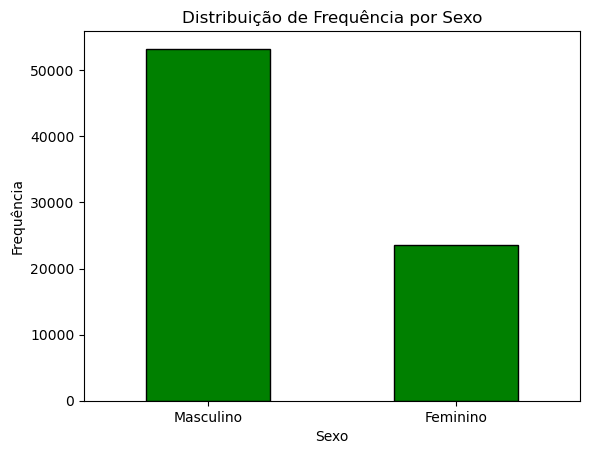

In [15]:
distribuicao_frequencias_qualitativas['Frequencia'].plot(
    kind='bar',
    color='green',
    edgecolor='black'
)
plt.title('Distribuição de Frequência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frequência')
plt.xticks(rotation=0)  
plt.show()

#### Distribuição de frequência relacionando sexo e a cor através de um dicionário

In [16]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indigena',
       2: 'Branca',
       4: 'Preta',
       6: 'Amarela',
       8: 'Parda',
       9: 'Sem declaração'}

frequencia = pd.crosstab(data.Sexo, data.Cor)
frequencia

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [17]:
frequencia.rename(index = sexo, columns = cor, inplace = True)
frequencia

Cor,Indigena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [18]:
percentual = pd.crosstab(data.Sexo, data.Cor, normalize = True)*100
percentual.rename(index = sexo, columns = cor, inplace = True)
percentual

Cor,Indigena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


#### Renda média dentro do cruzamento Sexo x Cor

aggfunc='mean': Especifica que a operação de agregação a ser realizada é a média.

values=data.Renda: Indica que os valores numéricos a serem usados no cálculo (média) são provenientes da coluna Renda.

In [19]:
percentual = pd.crosstab(data.Sexo, data.Cor, aggfunc = 'mean', values = data.Renda)
percentual

Cor,0,2,4,6,8
Sexo,,,,,
0,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
1,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [20]:
percentual.rename(index = sexo, columns = cor, inplace = True)
percentual

Cor,Indigena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


#### Em variáveis quantitativas precisamos criar classes para realizar a distribuição

In [21]:
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E', 'D', 'C', 'B', 'A']

x = data.Renda: Define os valores a serem categorizados 

bins = classes: Define as faixas de valores (classes) para a categorização

labels = labels: Atribui os rótulos correspondentes às faixas

include_lowest = True: Inclui o menor valor da primeira faixa (neste caso, 0) como parte da faixa inicial

In [22]:
pd.cut(x = data.Renda, bins = classes, labels = labels, include_lowest = True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [23]:
frequencia = pd.value_counts(pd.cut(x = data.Renda, bins = classes, labels = labels, include_lowest = True))

C:\Users\Beatriz Almeida\AppData\Local\Temp\ipykernel_2204\3598558164.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia = pd.value_counts(pd.cut(x = data.Renda, bins = classes, labels = labels, include_lowest = True))


In [24]:
percentual = pd.value_counts(pd.cut(x = data.Renda, bins = classes, labels = labels, include_lowest = True), normalize = True)

C:\Users\Beatriz Almeida\AppData\Local\Temp\ipykernel_2204\1701518943.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(pd.cut(x = data.Renda, bins = classes, labels = labels, include_lowest = True), normalize = True)


In [25]:
dist_freq_quantitativas_personalizadas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem': percentual})

dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem
Renda,,
E,49755,0.647514
D,16700,0.217335
C,7599,0.098894
B,2178,0.028345
A,608,0.007913


In [26]:
dist_freq_quantitativas_personalizadas.sort_index(ascending = False)


,Frequência,Porcentagem
Renda,,
A,608,0.007913
B,2178,0.028345
C,7599,0.098894
D,16700,0.217335
E,49755,0.647514


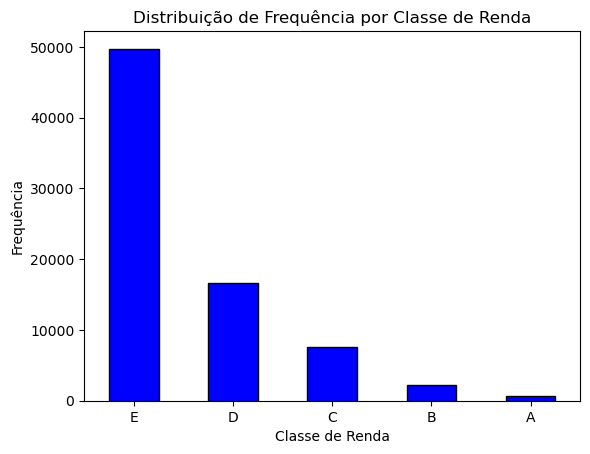

In [27]:
dist_freq_quantitativas_personalizadas['Frequência'].plot(
    kind='bar',
    color='blue',
    edgecolor='black'
)
plt.title('Distribuição de Frequência por Classe de Renda')
plt.xlabel('Classe de Renda')
plt.ylabel('Frequência')
plt.xticks(rotation=0) 
plt.show()

### Gráficos

#### Gráficos para Variáveis Qualitativas
Os mais usados são gráficos em barras 
e de composição em setores 

In [31]:
cor = {0: 'Indigena',
       2: 'Branca',
       4: 'Preta',
       6: 'Amarela',
       8: 'Parda',
       9: 'Sem declaração'}

data['Cor'] = data['Cor'].map(cor)
data['Cor']

0         Parda
1        Branca
2         Parda
3        Branca
4         Parda
          ...  
76835    Branca
76836     Preta
76837     Parda
76838     Parda
76839     Parda
Name: Cor, Length: 76840, dtype: object

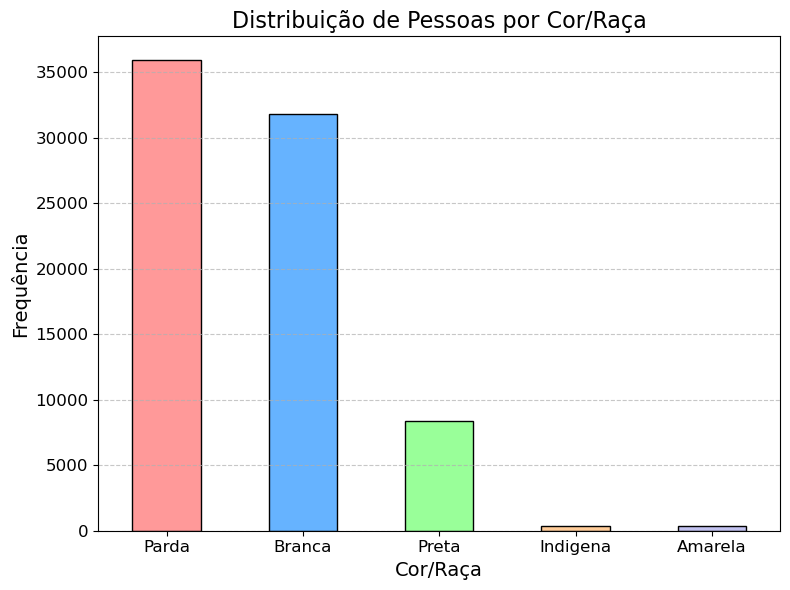

In [32]:
plt.figure(figsize=(8, 6)) 
data['Cor'].value_counts().plot(
    kind='bar',
    color=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6'],
    edgecolor='black'
)

plt.title('Distribuição de Pessoas por Cor/Raça', fontsize=16)
plt.xlabel('Cor/Raça', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=0, fontsize=12) 
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  

plt.show()

In [34]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

data['Sexo'] = data['Sexo'].map(sexo)
data['Sexo']

0        Masculino
1         Feminino
2         Feminino
3        Masculino
4         Feminino
           ...    
76835     Feminino
76836    Masculino
76837    Masculino
76838    Masculino
76839    Masculino
Name: Sexo, Length: 76840, dtype: object

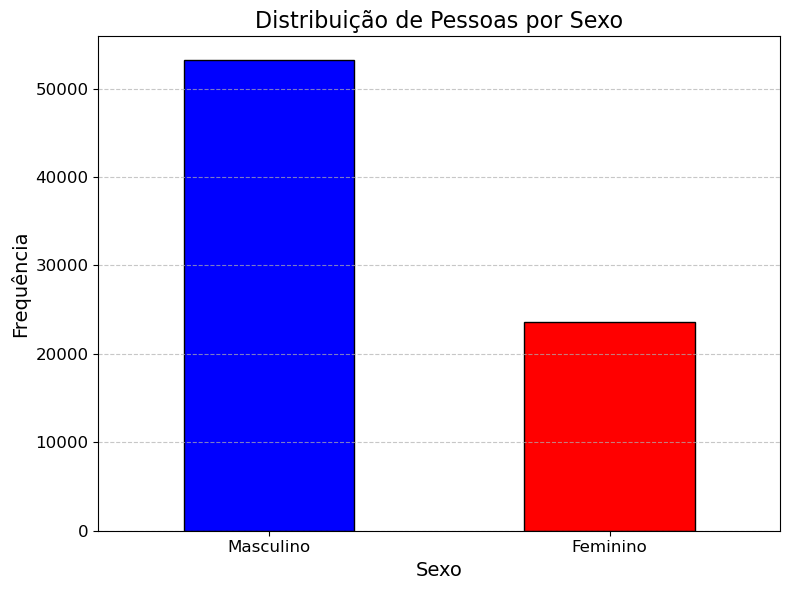

In [39]:
plt.figure(figsize=(8, 6)) 
data['Sexo'].value_counts().plot(
    kind='bar',
    color=['blue','red'],
    edgecolor='black'
)

plt.title('Distribuição de Pessoas por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=0, fontsize=12) 
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  

plt.show()

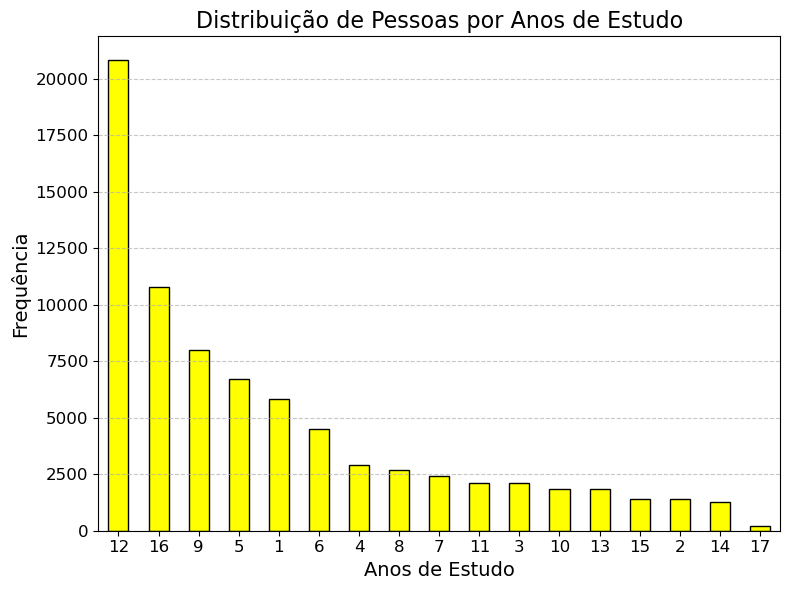

In [42]:
plt.figure(figsize=(8, 6)) 
data['Anos de Estudo'].value_counts().plot(
    kind='bar',
    color=['yellow'],
    edgecolor='black'
)

plt.title('Distribuição de Pessoas por Anos de Estudo', fontsize=16)
plt.xlabel('Anos de Estudo', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=0, fontsize=12) 
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  

plt.show()

#### Gráficos para Variáveis Quantitativas
Os mais usados são gráficos histogramas, gráficos de dispersão e boxplots

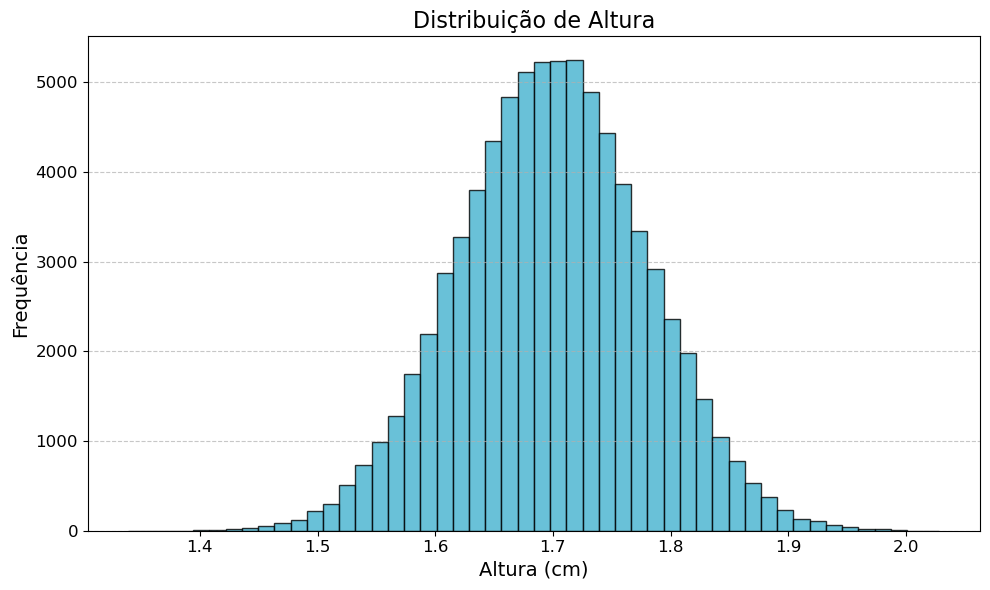

In [49]:
plt.figure(figsize=(10, 6))  
plt.hist(
    data['Altura'], 
    bins=50, 
    color='#43b2cf',  
    edgecolor='black', 
    alpha=0.8  
)

plt.title('Distribuição de Altura', fontsize=16)
plt.xlabel('Altura (cm)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()  

plt.show()

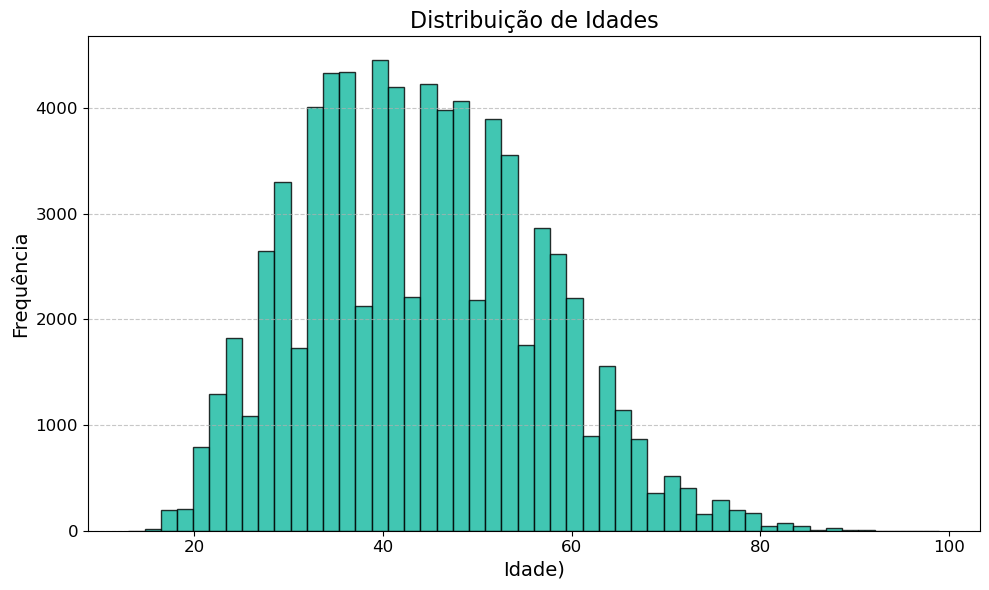

In [53]:
plt.figure(figsize=(10, 6))  
plt.hist(
    data['Idade'], 
    bins=50, 
    color='#12b89f',  
    edgecolor='black', 
    alpha=0.8  
)

plt.title('Distribuição de Idades', fontsize=16)
plt.xlabel('Idade)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()  

plt.show()

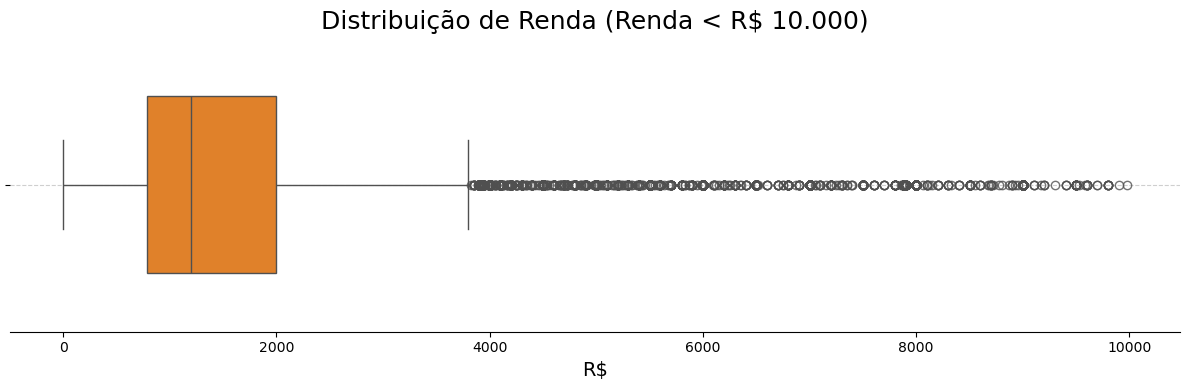

In [75]:
plt.figure(figsize=(12, 4))  
ax = sns.boxplot(
    x='Renda', 
    data=data.query('Renda < 10000'), 
    color='#ff800b',  
    width=0.6,  
    flierprops={'marker': 'o', 'color': '#ff6666', 'alpha': 0.8}  
)

ax.set_title('Distribuição de Renda (Renda < R$ 10.000)', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('')  
ax.grid(axis='y', linestyle='--', alpha=0.6)  
sns.despine(left=True) 


plt.tight_layout() 
plt.show()